In [1]:
#ESS survey

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
media = pd.read_csv("data/ESS1-7e01.csv")

In [4]:
media.head()

,cntry,cname,cedition,cproddat,cseqno,name,essround,edition,idno,dweight,...,tvtot,tvpol,rdtot,rdpol,nwsptot,nwsppol,netuse,ppltrst,pplfair,pplhlp
0,DE,ESS1-7e01,1.0,08.12.2016,59306,ESS1e06_5,1,6.5,101114,1.2572,...,7,0,0.0,66.0,0.0,66.0,NaN,0,5,4
1,DE,ESS1-7e01,1.0,08.12.2016,59307,ESS1e06_5,1,6.5,101120,1.2572,...,5,2,6.0,0.0,2.0,2.0,NaN,6,6,4
2,DE,ESS1-7e01,1.0,08.12.2016,59308,ESS1e06_5,1,6.5,101126,1.2572,...,5,2,7.0,2.0,1.0,1.0,NaN,0,0,0
3,DE,ESS1-7e01,1.0,08.12.2016,59309,ESS1e06_5,1,6.5,101304,1.2572,...,4,2,6.0,2.0,2.0,1.0,NaN,2,3,2
4,DE,ESS1-7e01,1.0,08.12.2016,59310,ESS1e06_5,1,6.5,101322,1.2572,...,3,0,0.0,66.0,1.0,1.0,NaN,0,7,5


In [5]:
media.tail()

,cntry,cname,cedition,cproddat,cseqno,name,essround,edition,idno,dweight,...,tvtot,tvpol,rdtot,rdpol,nwsptot,nwsppol,netuse,ppltrst,pplfair,pplhlp
91483,IT,ESS1-7e01,1.0,08.12.2016,215764,ESS6e02_3,6,2.3,4228,1.0,...,3,2,NaN,NaN,NaN,NaN,NaN,5,2,0
91484,IT,ESS1-7e01,1.0,08.12.2016,215765,ESS6e02_3,6,2.3,4229,1.0,...,4,2,NaN,NaN,NaN,NaN,NaN,3,3,3
91485,IT,ESS1-7e01,1.0,08.12.2016,215766,ESS6e02_3,6,2.3,4232,1.0,...,4,3,NaN,NaN,NaN,NaN,NaN,5,5,2
91486,IT,ESS1-7e01,1.0,08.12.2016,215767,ESS6e02_3,6,2.3,4233,1.0,...,2,1,NaN,NaN,NaN,NaN,NaN,5,6,4
91487,IT,ESS1-7e01,1.0,08.12.2016,215768,ESS6e02_3,6,2.3,4235,1.0,...,5,2,NaN,NaN,NaN,NaN,NaN,4,4,8


In [6]:
media.shape

(91488, 22)

In [7]:
labels = ["cntry", "essround", "tvtot", "tvpol", "rdtot", "rdpol", "nwsptot", "nwsppol", "netuse", "ppltrust", "pplfair", "pplhlp"]
media.loc[10000:10005, labels]

/Users/agold/anaconda/envs/jup37/lib/python3.7/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,cntry,essround,tvtot,tvpol,rdtot,rdpol,nwsptot,nwsppol,netuse,ppltrust,pplfair,pplhlp
10000,DE,4,3,1,2.0,1.0,1.0,1.0,5.0,NaN,4,7
10001,DE,4,2,1,2.0,1.0,0.0,66.0,4.0,NaN,7,7
10002,DE,4,6,1,0.0,66.0,1.0,1.0,0.0,NaN,4,4
10003,DE,4,4,2,7.0,1.0,1.0,1.0,6.0,NaN,7,7
10004,DE,4,6,4,7.0,7.0,1.0,1.0,1.0,NaN,3,1
10005,DE,4,3,1,6.0,1.0,1.0,1.0,7.0,NaN,4,4


In [8]:
media.loc[media["cntry"]=="DE", labels].shape

/Users/agold/anaconda/envs/jup37/lib/python3.7/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


(20490, 12)

In [9]:
plt.style.use("seaborn")

In [10]:
tv = media.loc[:, "tvtot"]
nwsp = media.loc[:, "nwsptot"]

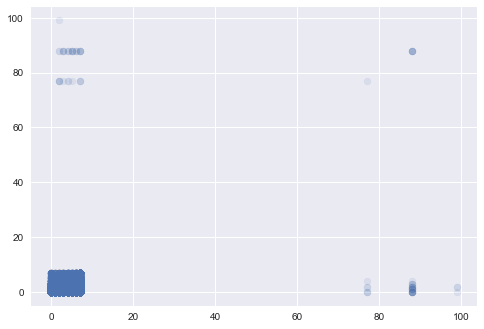

In [11]:
plt.scatter(tv, nwsp, alpha=0.1)

In [12]:
### round 6 only
media6 = media[media["essround"]==6]

In [13]:
media6.shape

(13908, 22)

In [14]:
tvtot6 = media6["tvtot"]
tvpol6 = media6["tvpol"]

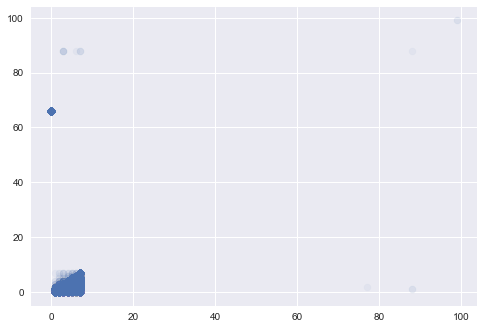

In [15]:
plt.scatter(tvtot6, tvpol6, alpha=0.05)

In [16]:
countries = media["cntry"].unique()
def color(cntry):
    clrs = []
    clist = countries.tolist()
    return clist.index(cntry)

In [17]:
colors = ['b', 'g', 'r', 'c', 'm', 'k', 'y']

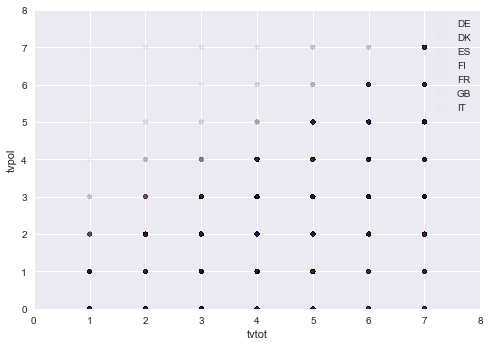

In [18]:
groups = media.groupby("cntry")
fig, ax = plt.subplots()
ax.set_xlim([0,8])
ax.set_ylim([0, 8])
for key, group in groups:
    group.plot(ax=ax, kind='scatter', x='tvtot', y='tvpol', label=key,
               color=colors, alpha=0.01)
plt.show()
    

In [19]:
np.count_nonzero(media["nwsppol"])

85602

In [20]:
media["dweight"].unique().shape

(6912,)

In [21]:
for key, group in groups:
    print(key, group[["tvtot", "tvpol"]].corr())

DE           tvtot     tvpol
tvtot  1.000000 -0.225688
tvpol -0.225688  1.000000
DK           tvtot     tvpol
tvtot  1.000000 -0.017458
tvpol -0.017458  1.000000
ES           tvtot     tvpol
tvtot  1.000000 -0.119111
tvpol -0.119111  1.000000
FI           tvtot     tvpol
tvtot  1.000000 -0.296472
tvpol -0.296472  1.000000
FR           tvtot     tvpol
tvtot  1.000000 -0.331402
tvpol -0.331402  1.000000
GB           tvtot     tvpol
tvtot  1.000000 -0.204667
tvpol -0.204667  1.000000
IT           tvtot     tvpol
tvtot  1.000000  0.012062
tvpol  0.012062  1.000000


In [22]:
for key, group in groups:
    print(key, group[["tvtot", "nwsptot"]].corr())

DE             tvtot   nwsptot
tvtot    1.000000  0.150771
nwsptot  0.150771  1.000000
DK             tvtot   nwsptot
tvtot    1.000000  0.130277
nwsptot  0.130277  1.000000
ES             tvtot   nwsptot
tvtot    1.000000  0.114542
nwsptot  0.114542  1.000000
FI             tvtot   nwsptot
tvtot    1.000000  0.289738
nwsptot  0.289738  1.000000
FR             tvtot   nwsptot
tvtot    1.000000  0.016434
nwsptot  0.016434  1.000000
GB             tvtot   nwsptot
tvtot    1.000000  0.218035
nwsptot  0.218035  1.000000
IT             tvtot   nwsptot
tvtot    1.000000 -0.001809
nwsptot -0.001809  1.000000


In [23]:
for key, group in groups:
    print(key, group[["nwsptot", "nwsppol"]].corr())

DE           nwsptot   nwsppol
nwsptot  1.000000 -0.371139
nwsppol -0.371139  1.000000
DK           nwsptot   nwsppol
nwsptot  1.000000 -0.256538
nwsppol -0.256538  1.000000
ES           nwsptot   nwsppol
nwsptot  1.000000 -0.241481
nwsppol -0.241481  1.000000
FI           nwsptot   nwsppol
nwsptot  1.000000 -0.305427
nwsppol -0.305427  1.000000
FR           nwsptot   nwsppol
nwsptot  1.000000 -0.436553
nwsppol -0.436553  1.000000
GB           nwsptot   nwsppol
nwsptot  1.000000 -0.361381
nwsppol -0.361381  1.000000
IT           nwsptot   nwsppol
nwsptot  1.000000 -0.152328
nwsppol -0.152328  1.000000


In [24]:
media.nwsptot.describe()

count    64840.000000
mean         1.404858
std          2.447509
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         99.000000
Name: nwsptot, dtype: float64

In [25]:
for key, group in groups:
    print(key, group.nwsptot.value_counts())


DE 2.0     4930
1.0     4884
0.0     2856
3.0     1145
4.0      443
5.0      118
6.0       63
7.0       44
88.0       3
77.0       1
Name: nwsptot, dtype: int64
DK 1.0     2682
2.0     2203
0.0     1802
3.0      622
4.0      208
5.0      101
6.0       36
7.0       25
88.0       4
99.0       1
Name: nwsptot, dtype: int64
ES 0.0     4638
1.0     2689
2.0     1777
3.0      393
4.0      115
5.0       51
7.0       31
6.0       19
77.0      11
88.0       5
Name: nwsptot, dtype: int64
FI 2.0     4019
1.0     3568
3.0      982
0.0      766
4.0      388
5.0      177
6.0       48
7.0       42
88.0       1
Name: nwsptot, dtype: int64
FR 0.0     3597
1.0     2849
2.0     1805
3.0      535
4.0      170
5.0       68
7.0       37
6.0       32
88.0       3
Name: nwsptot, dtype: int64
GB 0.0     3389
2.0     2934
1.0     2823
3.0      932
4.0      420
7.0      253
5.0      250
6.0      110
88.0       6
Name: nwsptot, dtype: int64
IT 1.0     955
0.0     853
2.0     640
3.0     176
4.0      56
5.0      2

In [27]:
media_by_country = {key: group for key, group in groups}

In [28]:
media_by_country["DE"].head()


,cntry,cname,cedition,cproddat,cseqno,name,essround,edition,idno,dweight,...,tvtot,tvpol,rdtot,rdpol,nwsptot,nwsppol,netuse,ppltrst,pplfair,pplhlp
0,DE,ESS1-7e01,1.0,08.12.2016,59306,ESS1e06_5,1,6.5,101114,1.2572,...,7,0,0.0,66.0,0.0,66.0,NaN,0,5,4
1,DE,ESS1-7e01,1.0,08.12.2016,59307,ESS1e06_5,1,6.5,101120,1.2572,...,5,2,6.0,0.0,2.0,2.0,NaN,6,6,4
2,DE,ESS1-7e01,1.0,08.12.2016,59308,ESS1e06_5,1,6.5,101126,1.2572,...,5,2,7.0,2.0,1.0,1.0,NaN,0,0,0
3,DE,ESS1-7e01,1.0,08.12.2016,59309,ESS1e06_5,1,6.5,101304,1.2572,...,4,2,6.0,2.0,2.0,1.0,NaN,2,3,2
4,DE,ESS1-7e01,1.0,08.12.2016,59310,ESS1e06_5,1,6.5,101322,1.2572,...,3,0,0.0,66.0,1.0,1.0,NaN,0,7,5


## Trust

In [54]:
def scatter_by_cntry(cntry, fld1, fld2):
    md = media_by_country[cntry]
    md = md[md[fld1] < 11]
    md = md[md[fld2] < 11]
    x = md[fld1]
    y = md[fld2]
    plt.scatter(x, y, alpha=0.005)    

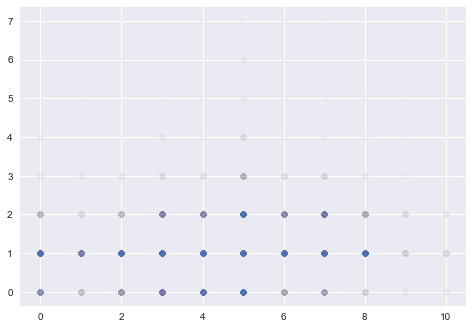

In [55]:
scatter_by_cntry("FR", "ppltrst", "nwsppol")

In [61]:
media.ppltrst.value_counts()

5     19303
7     15199
8     12762
6     10742
3      8666
4      8574
2      5040
0      3633
9      3368
1      2170
10     1828
88      169
77       19
99       15
Name: ppltrst, dtype: int64

In [62]:
media_by_country["FR"].ppltrst.value_counts()

5     3511
3     1666
4     1555
6     1400
7     1375
2     1114
0      896
8      735
1      432
9      172
10     112
88      13
Name: ppltrst, dtype: int64